In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
from datetime import timedelta

In [ ]:
df = pd.read_excel('../data/raw/MDB6 (INDUCTION)_20241028_111546.xlsx', header=4)

In [ ]:
df

,Date Time,VoltageL1,VoltageL2,VoltageL3,CurrentL1,CurrentL2,CurrentL3,kW,kWh,kVar,...,PF,Hz,THDVoltageL1,THDVoltageL2,THDVoltageL3,THDCurrentL1,THDCurrentL2,THDCurrentL3,AccDem,PeriodDem
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13/10/2024 22:55:00,480.9,483.6,477.7,0.0,0.0,0.0,0.0,5009660.0,0.0,...,0.0,49.97,0.9,1.1,1.0,0.0,0.0,0.0,0.0,0.0
3,13/10/2024 22:56:00,481.8,484.3,478.5,0.0,0.0,0.0,0.0,5009660.0,0.0,...,0.0,49.97,1.0,1.1,1.1,0.0,0.0,0.0,0.0,0.0
4,13/10/2024 22:57:00,481.0,483.7,477.7,0.0,0.0,0.0,0.0,5009660.0,0.0,...,0.0,49.96,0.9,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997,27/10/2024 23:55:00,478.7,481.6,475.0,0.0,0.0,0.0,0.0,5071461.0,0.0,...,0.0,49.95,1.1,1.4,1.2,0.0,0.0,0.0,0.0,0.0
19998,27/10/2024 23:56:00,479.4,482.2,475.7,0.0,0.0,0.0,0.0,5071461.0,0.0,...,0.0,49.93,1.1,1.3,1.2,0.0,0.0,0.0,0.0,0.0
19999,27/10/2024 23:57:00,480.0,482.9,476.3,0.0,0.0,0.0,0.0,5071461.0,0.0,...,0.0,49.95,1.2,1.5,1.4,0.0,0.0,0.0,0.0,0.0
20000,27/10/2024 23:58:00,480.3,483.1,476.3,0.0,0.0,0.0,0.0,5071461.0,0.0,...,0.0,49.95,1.1,1.4,1.2,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_cleaned = df.drop(index=[0, 1])
df_cleaned.head()

,Date Time,VoltageL1,VoltageL2,VoltageL3,CurrentL1,CurrentL2,CurrentL3,kW,kWh,kVar,...,PF,Hz,THDVoltageL1,THDVoltageL2,THDVoltageL3,THDCurrentL1,THDCurrentL2,THDCurrentL3,AccDem,PeriodDem
2,13/10/2024 22:55:00,480.9,483.6,477.7,0.0,0.0,0.0,0.0,5009660.0,0.0,...,0.0,49.97,0.9,1.1,1.0,0.0,0.0,0.0,0.0,0.0
3,13/10/2024 22:56:00,481.8,484.3,478.5,0.0,0.0,0.0,0.0,5009660.0,0.0,...,0.0,49.97,1.0,1.1,1.1,0.0,0.0,0.0,0.0,0.0
4,13/10/2024 22:57:00,481.0,483.7,477.7,0.0,0.0,0.0,0.0,5009660.0,0.0,...,0.0,49.96,0.9,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,13/10/2024 22:58:00,481.4,484.4,478.3,0.0,0.0,0.0,0.0,5009660.0,0.0,...,0.0,50.02,0.9,1.1,1.0,0.0,0.0,0.0,0.0,0.0
6,13/10/2024 22:59:00,480.9,483.5,477.7,0.0,0.0,0.0,0.0,5009660.0,0.0,...,0.0,49.97,0.9,1.1,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Format Date
df_cleaned['Date Time'] = pd.to_datetime(df_cleaned['Date Time'], format='%d/%m/%Y %H:%M:%S')

In [ ]:
fig = px.line(df_cleaned, x='Date Time', y='kW', title='Hourly kW Usage Over Time')
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    xaxis_title="Date Time",
    yaxis_title="kW Usage",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()

In [ ]:
df_day = df_cleaned[df_cleaned['Date Time'].dt.date == pd.to_datetime('2024-10-25').date()]

In [ ]:
fig = px.line(df_day, x='Date Time', y='kW', title='kW Usage on 2024-10-25')
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    xaxis_title="Date Time",
    yaxis_title="kW",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)


fig.show()

In [ ]:
# Calculate kWh/ton
batch_1_start = '2024-10-20 01:00:00'
batch_1_end = '2024-10-20 03:00:00'

df_batch_1 = df_cleaned[(df_cleaned['Date Time'] >= batch_1_start) & (df_cleaned['Date Time'] <= batch_1_end)]

# Calculate energy consumption for each batch by subtracting initial kWh from final kWh
energy_batch_1 = df_batch_1['kWh'].iloc[-1] - df_batch_1['kWh'].iloc[0]

print(f"Energy consumption for Batch 1: {energy_batch_1} kWh")

# Calculate energy consumtion per ton

ton_per_batch = 0.5 # 500 kg per batch

print(f"Energy consumption per batch: {energy_batch_1/ton_per_batch} kWh/ton")

Energy consumption for Batch 1: 603.0 kWh
Energy consumption per batch: 1206.0 kWh/ton


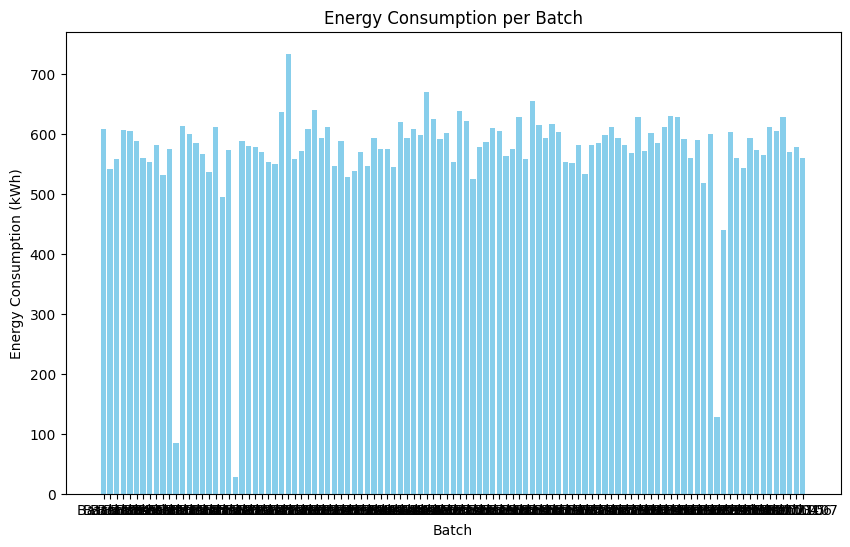

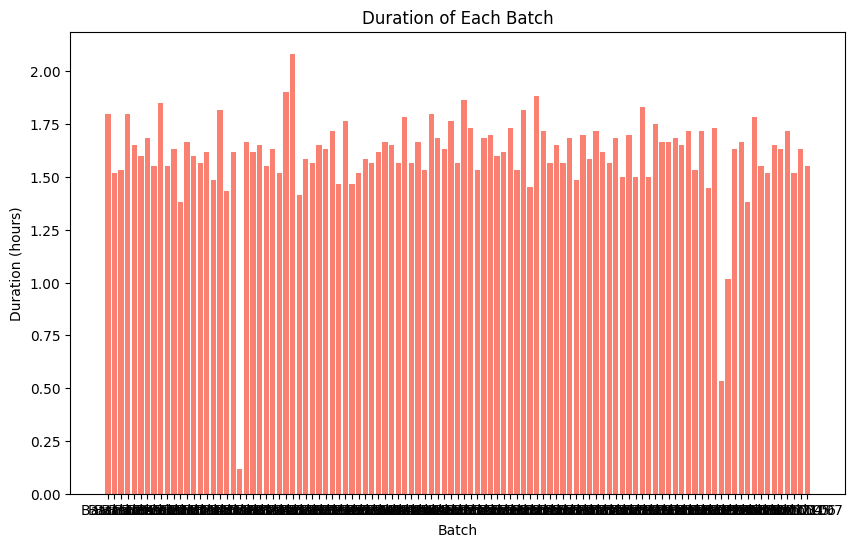

In [ ]:
# Step 1: Function to identify batches with time threshold
def identify_batches_with_time_threshold(df, kw_threshold=20, time_threshold_minutes=3):
    batches = []
    in_batch = False
    start_time = None
    last_above_threshold_time = None

    for i in range(len(df)):
        current_time = df['Date Time'].iloc[i]
        current_kw = df['kW'].iloc[i]

        if current_kw > kw_threshold:
            if not in_batch:
                start_time = current_time  # Start new batch
                in_batch = True
            last_above_threshold_time = current_time  # Update last time above threshold

        elif in_batch:
            # Check how long it's been since kW was above threshold
            if last_above_threshold_time and (current_time - last_above_threshold_time) > timedelta(minutes=time_threshold_minutes):
                end_time = last_above_threshold_time  # End batch at last valid time above threshold
                batches.append((start_time, end_time))
                in_batch = False  # Reset for next batch

    return batches

# Step 2: Identify batches using both kW and time thresholds
batches = identify_batches_with_time_threshold(df_cleaned, kw_threshold=30, time_threshold_minutes=3)

# Step 3: Calculate energy consumption for each batch
def calculate_energy(df, batches):
    energy_consumption = []
    for start, end in batches:
        start_index = df.index[df['Date Time'] == start][0]
        end_index = df.index[df['Date Time'] == end][0]
        energy_used = df['kWh'].iloc[end_index] - df['kWh'].iloc[start_index]
        energy_consumption.append(energy_used)
    return energy_consumption

energy_consumption = calculate_energy(df_cleaned, batches)

# Step 4: Calculate duration of each batch
def calculate_durations(batches):
    durations = []
    for start, end in batches:
        duration = (end - start).total_seconds() / 3600  # Convert to hours
        durations.append(duration)
    return durations

batch_durations = calculate_durations(batches)

# Step 5: Visualize results

# Plot energy consumption per batch
batch_names = [f'Batch {i+1}' for i in range(len(batches))]

plt.figure(figsize=(10, 6))
plt.bar(batch_names, energy_consumption, color='skyblue')
plt.xlabel('Batch')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption per Batch')
plt.show()

# Plot batch durations
plt.figure(figsize=(10, 6))
plt.bar(batch_names, batch_durations, color='salmon')
plt.xlabel('Batch')
plt.ylabel('Duration (hours)')
plt.title('Duration of Each Batch')
plt.show()

In [ ]:
# # fix start time batch 95 to '2024-10-25 16:10:00'
# batches[94][0] = batches[94][0] - timedelta(minutes=30)
batches[94] = (batches[94][0] - timedelta(minutes=30), batches[94][1])
batches[94]

(Timestamp('2024-10-25 16:05:01'), Timestamp('2024-10-25 17:49:00'))

In [ ]:
import pandas as pd
from datetime import timedelta
import plotly.graph_objects as go

# Assuming df_cleaned is your DataFrame with 'Date Time', 'kW', and 'kWh' columns
# And batches is a list of tuples with (start_time, end_time) for each batch

# Step 1: Extend each batch by 5 minutes before and 2 minutes after
extended_batches = [(start - timedelta(minutes=5), end + timedelta(minutes=2)) for start, end in batches]

# Step 2: Create an empty DataFrame to store the melt profile for each batch
df_melt_profile = pd.DataFrame(columns=['batch','start_time', 'end_time', 'kWh_usage', 'time_duration'])

# Step 3: Iterate over each batch and calculate kWh usage and time duration
for i, (start_time, end_time) in enumerate(extended_batches):
    # Filter data for the current batch
    df_batch = df_cleaned[(df_cleaned['Date Time'] >= start_time) & (df_cleaned['Date Time'] <= end_time)]

    if not df_batch.empty:
        # Calculate kWh usage: last kWh - first kWh
        kWh_start = df_batch['kWh'].iloc[0]
        kWh_end = df_batch['kWh'].iloc[-1]
        kWh_usage = kWh_end - kWh_start

        # Calculate time duration in minutes
        time_duration = (end_time - start_time).total_seconds() / 60  # Convert to minutes

        # Create a new row as a DataFrame and concatenate it to df_melt_profile using pd.concat()
        new_row = pd.DataFrame({
            'batch': [i + 1],
            'start_time': [start_time],
            'end_time': [end_time],
            'kWh_usage': [kWh_usage],
            'time_duration': [time_duration]
        })

        df_melt_profile = pd.concat([df_melt_profile, new_row], ignore_index=True)

        # Print results for each batch
        print(f"Batch {i+1}:")
        print(f"Start Time: {start_time}")
        print(f"End Time: {end_time}")
        print(f"kWh Usage: {kWh_usage:.2f} kWh")
        print(f"Time Duration: {time_duration:.2f} minutes")
        print("-" * 40)
    else:
        print(f"Batch {i+1}: No data available after extending by 5 minutes.")

    # Step 4: Create a figure with two y-axes (kW and cumulative kWh)
    fig = go.Figure()

    # Plot kW usage on the first y-axis
    fig.add_trace(go.Scatter(x=df_batch['Date Time'], y=df_batch['kW'], mode='lines', name='kW Usage'))

    # Plot cumulative kWh usage on the second y-axis
    fig.add_trace(go.Scatter(x=df_batch['Date Time'], y=df_batch['kWh'], mode='lines', name='Cumulative kWh Usage', yaxis="y2"))

    # Step 5: Update layout to include two y-axes
    fig.update_layout(
        title=f'Batch {i+1}: kW and Cumulative kWh Usage',
        xaxis_title='Time',
        yaxis_title='kW Usage',
        yaxis2=dict(title='Cumulative kWh Usage', overlaying='y', side='right'),
        legend=dict(x=0.01, y=0.99),
        xaxis=dict(rangeslider=dict(visible=True)),
    )

    # Step 6: Show the plot for this batch
    fig.show()


Batch 1:
Start Time: 2024-10-14 08:15:00
End Time: 2024-10-14 10:10:00
kWh Usage: 611.00 kWh
Time Duration: 115.00 minutes
----------------------------------------


<ipython-input-13-cd23cb0c3531>:37: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Batch 2:
Start Time: 2024-10-14 10:14:00
End Time: 2024-10-14 11:52:00
kWh Usage: 545.00 kWh
Time Duration: 98.00 minutes
----------------------------------------


Batch 3:
Start Time: 2024-10-14 11:57:00
End Time: 2024-10-14 13:36:00
kWh Usage: 559.00 kWh
Time Duration: 99.00 minutes
----------------------------------------


Batch 4:
Start Time: 2024-10-14 13:38:00
End Time: 2024-10-14 15:33:00
kWh Usage: 609.00 kWh
Time Duration: 115.00 minutes
----------------------------------------


Batch 5:
Start Time: 2024-10-14 16:06:00
End Time: 2024-10-14 17:52:00
kWh Usage: 607.00 kWh
Time Duration: 106.00 minutes
----------------------------------------


Batch 6:
Start Time: 2024-10-14 22:18:00
End Time: 2024-10-15 00:01:00
kWh Usage: 590.00 kWh
Time Duration: 103.00 minutes
----------------------------------------


Batch 7:
Start Time: 2024-10-15 01:00:00
End Time: 2024-10-15 02:48:00
kWh Usage: 561.00 kWh
Time Duration: 108.00 minutes
----------------------------------------


Batch 8:
Start Time: 2024-10-15 03:09:00
End Time: 2024-10-15 04:49:00
kWh Usage: 555.00 kWh
Time Duration: 100.00 minutes
----------------------------------------


Batch 9:
Start Time: 2024-10-15 05:25:00
End Time: 2024-10-15 07:23:00
kWh Usage: 582.00 kWh
Time Duration: 118.00 minutes
----------------------------------------


Batch 10:
Start Time: 2024-10-15 08:01:00
End Time: 2024-10-15 09:41:00
kWh Usage: 533.00 kWh
Time Duration: 100.00 minutes
----------------------------------------


Batch 11:
Start Time: 2024-10-15 09:47:00
End Time: 2024-10-15 11:32:00
kWh Usage: 560.00 kWh
Time Duration: 105.00 minutes
----------------------------------------


Batch 12:
Start Time: 2024-10-15 12:02:00
End Time: 2024-10-15 13:32:00
kWh Usage: 549.00 kWh
Time Duration: 90.00 minutes
----------------------------------------


Batch 13:
Start Time: 2024-10-15 13:47:00
End Time: 2024-10-15 15:34:00
kWh Usage: 617.00 kWh
Time Duration: 107.00 minutes
----------------------------------------


Batch 14:
Start Time: 2024-10-15 16:08:00
End Time: 2024-10-15 17:51:00
kWh Usage: 605.00 kWh
Time Duration: 103.00 minutes
----------------------------------------


Batch 15:
Start Time: 2024-10-15 22:20:00
End Time: 2024-10-16 00:01:00
kWh Usage: 587.00 kWh
Time Duration: 101.00 minutes
----------------------------------------


Batch 16:
Start Time: 2024-10-16 01:02:00
End Time: 2024-10-16 02:46:00
kWh Usage: 568.00 kWh
Time Duration: 104.00 minutes
----------------------------------------


Batch 17:
Start Time: 2024-10-16 03:10:00
End Time: 2024-10-16 04:46:00
kWh Usage: 538.00 kWh
Time Duration: 96.00 minutes
----------------------------------------


Batch 18:
Start Time: 2024-10-16 05:25:00
End Time: 2024-10-16 07:21:00
kWh Usage: 616.00 kWh
Time Duration: 116.00 minutes
----------------------------------------


Batch 19:
Start Time: 2024-10-16 08:12:00
End Time: 2024-10-16 09:45:00
kWh Usage: 497.00 kWh
Time Duration: 93.00 minutes
----------------------------------------


Batch 20:
Start Time: 2024-10-16 09:46:00
End Time: 2024-10-16 11:30:00
kWh Usage: 577.00 kWh
Time Duration: 104.00 minutes
----------------------------------------


Batch 21:
Start Time: 2024-10-16 11:30:00
End Time: 2024-10-16 11:44:00
kWh Usage: 38.00 kWh
Time Duration: 14.00 minutes
----------------------------------------


Batch 22:
Start Time: 2024-10-16 11:52:00
End Time: 2024-10-16 13:39:00
kWh Usage: 589.00 kWh
Time Duration: 107.00 minutes
----------------------------------------


Batch 23:
Start Time: 2024-10-16 13:49:00
End Time: 2024-10-16 15:33:00
kWh Usage: 583.00 kWh
Time Duration: 104.00 minutes
----------------------------------------


Batch 24:
Start Time: 2024-10-16 16:07:00
End Time: 2024-10-16 17:53:00
kWh Usage: 580.00 kWh
Time Duration: 106.00 minutes
----------------------------------------


Batch 25:
Start Time: 2024-10-16 22:20:00
End Time: 2024-10-17 00:00:00
kWh Usage: 572.00 kWh
Time Duration: 100.00 minutes
----------------------------------------


Batch 26:
Start Time: 2024-10-17 01:00:00
End Time: 2024-10-17 02:45:00
kWh Usage: 554.00 kWh
Time Duration: 105.00 minutes
----------------------------------------


Batch 27:
Start Time: 2024-10-17 03:11:00
End Time: 2024-10-17 04:49:00
kWh Usage: 554.00 kWh
Time Duration: 98.00 minutes
----------------------------------------


Batch 28:
Start Time: 2024-10-17 05:27:00
End Time: 2024-10-17 07:28:00
kWh Usage: 638.00 kWh
Time Duration: 121.00 minutes
----------------------------------------


Batch 29:
Start Time: 2024-10-17 08:02:00
End Time: 2024-10-17 10:14:01
kWh Usage: 735.00 kWh
Time Duration: 132.02 minutes
----------------------------------------


Batch 30:
Start Time: 2024-10-17 10:21:00
End Time: 2024-10-17 11:53:00
kWh Usage: 561.00 kWh
Time Duration: 92.00 minutes
----------------------------------------


Batch 31:
Start Time: 2024-10-17 11:57:00
End Time: 2024-10-17 13:39:00
kWh Usage: 573.00 kWh
Time Duration: 102.00 minutes
----------------------------------------


Batch 32:
Start Time: 2024-10-17 13:47:00
End Time: 2024-10-17 15:28:00
kWh Usage: 611.00 kWh
Time Duration: 101.00 minutes
----------------------------------------


Batch 33:
Start Time: 2024-10-17 16:07:00
End Time: 2024-10-17 17:53:00
kWh Usage: 643.00 kWh
Time Duration: 106.00 minutes
----------------------------------------


Batch 34:
Start Time: 2024-10-17 22:18:00
End Time: 2024-10-18 00:03:00
kWh Usage: 593.00 kWh
Time Duration: 105.00 minutes
----------------------------------------


Batch 35:
Start Time: 2024-10-18 00:59:00
End Time: 2024-10-18 02:49:00
kWh Usage: 614.00 kWh
Time Duration: 110.00 minutes
----------------------------------------


Batch 36:
Start Time: 2024-10-18 03:11:00
End Time: 2024-10-18 04:46:00
kWh Usage: 548.00 kWh
Time Duration: 95.00 minutes
----------------------------------------


Batch 37:
Start Time: 2024-10-18 05:25:00
End Time: 2024-10-18 07:18:00
kWh Usage: 589.00 kWh
Time Duration: 113.00 minutes
----------------------------------------


Batch 38:
Start Time: 2024-10-18 08:12:00
End Time: 2024-10-18 09:47:00
kWh Usage: 530.00 kWh
Time Duration: 95.00 minutes
----------------------------------------


Batch 39:
Start Time: 2024-10-18 09:57:00
End Time: 2024-10-18 11:35:00
kWh Usage: 539.00 kWh
Time Duration: 98.00 minutes
----------------------------------------


Batch 40:
Start Time: 2024-10-18 12:00:00
End Time: 2024-10-18 13:42:00
kWh Usage: 574.00 kWh
Time Duration: 102.00 minutes
----------------------------------------


Batch 41:
Start Time: 2024-10-18 13:54:00
End Time: 2024-10-18 15:35:00
kWh Usage: 550.00 kWh
Time Duration: 101.00 minutes
----------------------------------------


Batch 42:
Start Time: 2024-10-18 16:09:00
End Time: 2024-10-18 17:53:00
kWh Usage: 597.00 kWh
Time Duration: 104.00 minutes
----------------------------------------


Batch 43:
Start Time: 2024-10-18 22:20:00
End Time: 2024-10-19 00:07:00
kWh Usage: 577.00 kWh
Time Duration: 107.00 minutes
----------------------------------------


Batch 44:
Start Time: 2024-10-19 01:04:00
End Time: 2024-10-19 02:50:00
kWh Usage: 579.00 kWh
Time Duration: 106.00 minutes
----------------------------------------


Batch 45:
Start Time: 2024-10-19 03:10:00
End Time: 2024-10-19 04:51:00
kWh Usage: 546.00 kWh
Time Duration: 101.00 minutes
----------------------------------------


Batch 46:
Start Time: 2024-10-19 05:25:00
End Time: 2024-10-19 07:19:00
kWh Usage: 624.00 kWh
Time Duration: 114.00 minutes
----------------------------------------


Batch 47:
Start Time: 2024-10-19 08:02:00
End Time: 2024-10-19 09:43:00
kWh Usage: 595.00 kWh
Time Duration: 101.00 minutes
----------------------------------------


Batch 48:
Start Time: 2024-10-19 09:52:00
End Time: 2024-10-19 11:39:00
kWh Usage: 614.00 kWh
Time Duration: 107.00 minutes
----------------------------------------


Batch 49:
Start Time: 2024-10-19 12:00:00
End Time: 2024-10-19 13:39:00
kWh Usage: 602.00 kWh
Time Duration: 99.00 minutes
----------------------------------------


Batch 50:
Start Time: 2024-10-19 13:47:00
End Time: 2024-10-19 15:42:00
kWh Usage: 672.00 kWh
Time Duration: 115.00 minutes
----------------------------------------


Batch 51:
Start Time: 2024-10-19 16:07:00
End Time: 2024-10-19 17:55:00
kWh Usage: 628.00 kWh
Time Duration: 108.00 minutes
----------------------------------------


Batch 52:
Start Time: 2024-10-19 22:17:00
End Time: 2024-10-20 00:02:00
kWh Usage: 593.00 kWh
Time Duration: 105.00 minutes
----------------------------------------


Batch 53:
Start Time: 2024-10-20 00:59:00
End Time: 2024-10-20 02:52:00
kWh Usage: 603.00 kWh
Time Duration: 113.00 minutes
----------------------------------------


Batch 54:
Start Time: 2024-10-20 03:08:00
End Time: 2024-10-20 04:49:00
kWh Usage: 555.00 kWh
Time Duration: 101.00 minutes
----------------------------------------


Batch 55:
Start Time: 2024-10-20 05:25:00
End Time: 2024-10-20 07:24:00
kWh Usage: 638.00 kWh
Time Duration: 119.00 minutes
----------------------------------------


Batch 56:
Start Time: 2024-10-21 08:17:00
End Time: 2024-10-21 10:08:00
kWh Usage: 626.00 kWh
Time Duration: 111.00 minutes
----------------------------------------


Batch 57:
Start Time: 2024-10-21 10:08:00
End Time: 2024-10-21 11:47:00
kWh Usage: 528.00 kWh
Time Duration: 99.00 minutes
----------------------------------------


Batch 58:
Start Time: 2024-10-21 11:50:00
End Time: 2024-10-21 13:38:00
kWh Usage: 579.00 kWh
Time Duration: 108.00 minutes
----------------------------------------


Batch 59:
Start Time: 2024-10-21 13:47:00
End Time: 2024-10-21 15:36:00
kWh Usage: 589.00 kWh
Time Duration: 109.00 minutes
----------------------------------------


Batch 60:
Start Time: 2024-10-21 16:09:00
End Time: 2024-10-21 17:52:00
kWh Usage: 614.00 kWh
Time Duration: 103.00 minutes
----------------------------------------


Batch 61:
Start Time: 2024-10-21 22:17:00
End Time: 2024-10-22 00:01:00
kWh Usage: 607.00 kWh
Time Duration: 104.00 minutes
----------------------------------------


Batch 62:
Start Time: 2024-10-22 01:00:00
End Time: 2024-10-22 02:51:00
kWh Usage: 567.00 kWh
Time Duration: 111.00 minutes
----------------------------------------


Batch 63:
Start Time: 2024-10-22 03:09:00
End Time: 2024-10-22 04:48:00
kWh Usage: 575.00 kWh
Time Duration: 99.00 minutes
----------------------------------------


Batch 64:
Start Time: 2024-10-22 05:27:00
End Time: 2024-10-22 07:23:00
kWh Usage: 632.00 kWh
Time Duration: 116.00 minutes
----------------------------------------


Batch 65:
Start Time: 2024-10-22 08:06:59
End Time: 2024-10-22 09:41:00
kWh Usage: 558.00 kWh
Time Duration: 94.02 minutes
----------------------------------------


Batch 66:
Start Time: 2024-10-22 09:43:00
End Time: 2024-10-22 11:43:00
kWh Usage: 657.00 kWh
Time Duration: 120.00 minutes
----------------------------------------


Batch 67:
Start Time: 2024-10-22 11:59:00
End Time: 2024-10-22 13:49:00
kWh Usage: 618.00 kWh
Time Duration: 110.00 minutes
----------------------------------------


Batch 68:
Start Time: 2024-10-22 13:55:00
End Time: 2024-10-22 15:36:00
kWh Usage: 596.00 kWh
Time Duration: 101.00 minutes
----------------------------------------


Batch 69:
Start Time: 2024-10-22 16:07:00
End Time: 2024-10-22 17:53:00
kWh Usage: 619.00 kWh
Time Duration: 106.00 minutes
----------------------------------------


Batch 70:
Start Time: 2024-10-22 22:22:00
End Time: 2024-10-23 00:03:00
kWh Usage: 606.00 kWh
Time Duration: 101.00 minutes
----------------------------------------


Batch 71:
Start Time: 2024-10-23 01:01:00
End Time: 2024-10-23 02:49:00
kWh Usage: 555.00 kWh
Time Duration: 108.00 minutes
----------------------------------------


Batch 72:
Start Time: 2024-10-23 03:11:00
End Time: 2024-10-23 04:47:00
kWh Usage: 556.00 kWh
Time Duration: 96.00 minutes
----------------------------------------


Batch 73:
Start Time: 2024-10-23 05:26:00
End Time: 2024-10-23 07:15:00
kWh Usage: 583.00 kWh
Time Duration: 109.00 minutes
----------------------------------------


Batch 74:
Start Time: 2024-10-23 08:08:00
End Time: 2024-10-23 09:50:01
kWh Usage: 535.00 kWh
Time Duration: 102.02 minutes
----------------------------------------


Batch 75:
Start Time: 2024-10-23 09:51:01
End Time: 2024-10-23 11:41:00
kWh Usage: 584.00 kWh
Time Duration: 109.98 minutes
----------------------------------------


Batch 76:
Start Time: 2024-10-23 11:52:00
End Time: 2024-10-23 13:36:00
kWh Usage: 587.00 kWh
Time Duration: 104.00 minutes
----------------------------------------


Batch 77:
Start Time: 2024-10-23 13:53:00
End Time: 2024-10-23 15:34:00
kWh Usage: 602.00 kWh
Time Duration: 101.00 minutes
----------------------------------------


Batch 78:
Start Time: 2024-10-23 16:07:00
End Time: 2024-10-23 17:55:00
kWh Usage: 616.00 kWh
Time Duration: 108.00 minutes
----------------------------------------


Batch 79:
Start Time: 2024-10-23 22:25:00
End Time: 2024-10-24 00:02:00
kWh Usage: 599.00 kWh
Time Duration: 97.00 minutes
----------------------------------------


Batch 80:
Start Time: 2024-10-24 01:00:00
End Time: 2024-10-24 02:49:00
kWh Usage: 585.00 kWh
Time Duration: 109.00 minutes
----------------------------------------


Batch 81:
Start Time: 2024-10-24 03:11:00
End Time: 2024-10-24 04:48:00
kWh Usage: 570.00 kWh
Time Duration: 97.00 minutes
----------------------------------------


Batch 82:
Start Time: 2024-10-24 05:25:00
End Time: 2024-10-24 07:22:00
kWh Usage: 630.00 kWh
Time Duration: 117.00 minutes
----------------------------------------


Batch 83:
Start Time: 2024-10-24 08:06:00
End Time: 2024-10-24 09:43:00
kWh Usage: 573.00 kWh
Time Duration: 97.00 minutes
----------------------------------------


Batch 84:
Start Time: 2024-10-24 09:47:00
End Time: 2024-10-24 11:39:01
kWh Usage: 604.00 kWh
Time Duration: 112.02 minutes
----------------------------------------


Batch 85:
Start Time: 2024-10-24 11:52:00
End Time: 2024-10-24 13:39:00
kWh Usage: 587.00 kWh
Time Duration: 107.00 minutes
----------------------------------------


Batch 86:
Start Time: 2024-10-24 13:47:00
End Time: 2024-10-24 15:34:00
kWh Usage: 615.00 kWh
Time Duration: 107.00 minutes
----------------------------------------


Batch 87:
Start Time: 2024-10-24 16:07:00
End Time: 2024-10-24 17:55:00
kWh Usage: 632.00 kWh
Time Duration: 108.00 minutes
----------------------------------------


Batch 88:
Start Time: 2024-10-24 22:18:00
End Time: 2024-10-25 00:04:00
kWh Usage: 631.00 kWh
Time Duration: 106.00 minutes
----------------------------------------


Batch 89:
Start Time: 2024-10-25 00:59:00
End Time: 2024-10-25 02:49:00
kWh Usage: 594.00 kWh
Time Duration: 110.00 minutes
----------------------------------------


Batch 90:
Start Time: 2024-10-25 03:10:00
End Time: 2024-10-25 04:49:00
kWh Usage: 562.00 kWh
Time Duration: 99.00 minutes
----------------------------------------


Batch 91:
Start Time: 2024-10-25 05:25:00
End Time: 2024-10-25 07:15:00
kWh Usage: 592.00 kWh
Time Duration: 110.00 minutes
----------------------------------------


Batch 92:
Start Time: 2024-10-25 11:46:00
End Time: 2024-10-25 13:20:00
kWh Usage: 522.00 kWh
Time Duration: 94.00 minutes
----------------------------------------


Batch 93:
Start Time: 2024-10-25 13:44:00
End Time: 2024-10-25 15:35:00
kWh Usage: 602.00 kWh
Time Duration: 111.00 minutes
----------------------------------------


Batch 94:
Start Time: 2024-10-25 16:06:00
End Time: 2024-10-25 16:45:00
kWh Usage: 132.00 kWh
Time Duration: 39.00 minutes
----------------------------------------


Batch 95:
Start Time: 2024-10-25 16:00:01
End Time: 2024-10-25 17:51:00
kWh Usage: 592.00 kWh
Time Duration: 110.98 minutes
----------------------------------------


Batch 96:
Start Time: 2024-10-25 22:18:00
End Time: 2024-10-26 00:03:00
kWh Usage: 605.00 kWh
Time Duration: 105.00 minutes
----------------------------------------


Batch 97:
Start Time: 2024-10-26 01:02:00
End Time: 2024-10-26 02:49:00
kWh Usage: 562.00 kWh
Time Duration: 107.00 minutes
----------------------------------------


Batch 98:
Start Time: 2024-10-26 03:20:00
End Time: 2024-10-26 04:50:00
kWh Usage: 551.00 kWh
Time Duration: 90.00 minutes
----------------------------------------


Batch 99:
Start Time: 2024-10-26 05:27:00
End Time: 2024-10-26 07:21:00
kWh Usage: 594.00 kWh
Time Duration: 114.00 minutes
----------------------------------------


Batch 100:
Start Time: 2024-10-26 09:55:00
End Time: 2024-10-26 11:35:00
kWh Usage: 575.00 kWh
Time Duration: 100.00 minutes
----------------------------------------


Batch 101:
Start Time: 2024-10-26 11:55:00
End Time: 2024-10-26 13:33:00
kWh Usage: 569.00 kWh
Time Duration: 98.00 minutes
----------------------------------------


Batch 102:
Start Time: 2024-10-26 13:47:00
End Time: 2024-10-26 15:33:00
kWh Usage: 615.00 kWh
Time Duration: 106.00 minutes
----------------------------------------


Batch 103:
Start Time: 2024-10-26 16:07:00
End Time: 2024-10-26 17:52:00
kWh Usage: 606.00 kWh
Time Duration: 105.00 minutes
----------------------------------------


Batch 104:
Start Time: 2024-10-26 20:11:00
End Time: 2024-10-26 22:01:00
kWh Usage: 630.00 kWh
Time Duration: 110.00 minutes
----------------------------------------


Batch 105:
Start Time: 2024-10-26 22:23:00
End Time: 2024-10-27 00:01:00
kWh Usage: 571.00 kWh
Time Duration: 98.00 minutes
----------------------------------------


Batch 106:
Start Time: 2024-10-27 01:02:00
End Time: 2024-10-27 02:47:00
kWh Usage: 582.00 kWh
Time Duration: 105.00 minutes
----------------------------------------


Batch 107:
Start Time: 2024-10-27 03:09:00
End Time: 2024-10-27 04:49:00
kWh Usage: 560.00 kWh
Time Duration: 100.00 minutes
----------------------------------------


In [ ]:
# clean batch 21 cause abnormal data
df_melt_profile.iloc[20]

,20
batch,21
start_time,2024-10-16 11:30:00
end_time,2024-10-16 11:44:00
kWh_usage,38.0
time_duration,14.0


In [ ]:
# df_melt_profile_clean = df_melt_profile.drop(index=[20])
df_melt_profile_clean = df_melt_profile
df_melt_profile_clean
# df_melt_profile_clean[df_melt_profile_clean['batch'] == 94]

,batch,start_time,end_time,kWh_usage,time_duration
0,1,2024-10-14 08:15:00,2024-10-14 10:10:00,611.0,115.0
1,2,2024-10-14 10:14:00,2024-10-14 11:52:00,545.0,98.0
2,3,2024-10-14 11:57:00,2024-10-14 13:36:00,559.0,99.0
3,4,2024-10-14 13:38:00,2024-10-14 15:33:00,609.0,115.0
4,5,2024-10-14 16:06:00,2024-10-14 17:52:00,607.0,106.0
...,...,...,...,...,...
102,103,2024-10-26 16:07:00,2024-10-26 17:52:00,606.0,105.0
103,104,2024-10-26 20:11:00,2024-10-26 22:01:00,630.0,110.0
104,105,2024-10-26 22:23:00,2024-10-27 00:01:00,571.0,98.0
105,106,2024-10-27 01:02:00,2024-10-27 02:47:00,582.0,105.0


In [ ]:
# Step 1: Calculate average time duration and kWh usage
average_time_duration = df_melt_profile_clean['time_duration'].mean()
average_kWh_usage = df_melt_profile_clean['kWh_usage'].mean()

# Step 2: Create a scatter plot for kWh usage vs. time duration
fig = px.scatter(df_melt_profile_clean,
                 x='time_duration',
                 y='kWh_usage',
                 title='Scatter Plot of kWh Usage vs Time Duration with Average',
                 labels={'time_duration': 'Time Duration (minutes)', 'kWh_usage': 'kWh Usage'},
                 hover_data=['start_time', 'end_time', 'batch'])

# Step 3: Add a marker for the average values
fig.add_trace(go.Scatter(
    x=[average_time_duration],
    y=[average_kWh_usage],
    mode='markers+text',
    marker=dict(color='red', size=12, symbol='x'),
    text=['Average'],
    textposition='top center',
    name='Average'
))

# Step 4: Show the updated plot with the average marker
fig.show()

# Print out the average values for reference
print(f"Average Time Duration: {average_time_duration:.2f} minutes")
print(f"Average kWh Usage: {average_kWh_usage:.2f} kWh")

Average Time Duration: 103.62 minutes
Average kWh Usage: 578.39 kWh


In [ ]:
# Step 1: Calculate cool-down time between batches
df_melt_profile_clean['cool_down_time'] = (
    df_melt_profile_clean['start_time'] - df_melt_profile_clean['end_time'].shift()
).dt.total_seconds() / 60  # Convert to minutes

# Step 2: Fill NaN values in the first row with 0
df_melt_profile_clean['cool_down_time'] = df_melt_profile_clean['cool_down_time'].fillna(0)

# Step 3: Classify shifts based on start_time
def classify_shift(start_time):
    hour = start_time.hour
    if 8 <= hour < 18:
        return 'Day Shift'
    else:
        return 'Night Shift'

# Add a new column 'shift' to classify each batch
df_melt_profile_clean['shift'] = df_melt_profile_clean['start_time'].apply(classify_shift)

# Step 4: Calculate average time duration and kWh usage
average_time_duration = df_melt_profile_clean['time_duration'].mean()
average_kWh_usage = df_melt_profile_clean['kWh_usage'].mean()

# Step 5: Create a scatter plot with color differentiation for shifts
fig = px.scatter(df_melt_profile_clean,
                 x='time_duration',
                 y='kWh_usage',
                 color='shift',  # Differentiate by shift
                 title='Scatter Plot of kWh Usage vs Time Duration by Shift',
                 labels={'time_duration': 'Time Duration (minutes)', 'kWh_usage': 'kWh Usage', 'shift': 'Shift'},
                 hover_data=['start_time', 'end_time', 'batch', 'cool_down_time'])

# Step 6: Add a marker for the average values
fig.add_trace(go.Scatter(
    x=[average_time_duration],
    y=[average_kWh_usage],
    mode='markers+text',
    marker=dict(color='red', size=12, symbol='x'),
    text=['Average'],
    textposition='top center',
    name='Average'
))

# Step 7: Show the updated plot with shift-based coloring and average marker
fig.show()

# Print out the average values for reference
print(f"Average Time Duration: {average_time_duration:.2f} minutes")
print(f"Average kWh Usage: {average_kWh_usage:.2f} kWh")


Average Time Duration: 103.62 minutes
Average kWh Usage: 578.39 kWh


In [ ]:
# Step 1: Classify shifts based on start_time
def classify_shift(start_time):
    hour = start_time.hour
    if 8 <= hour < 12:
        return 'Morning Shift'
    elif 12 <= hour < 16:
        return 'Afternoon Shift'
    elif 16 <= hour < 20:
        return 'Evening Shift'
    else:
        return 'Night Shift'

# Add a new column 'shift' to classify each batch
df_melt_profile_clean['shift'] = df_melt_profile_clean['start_time'].apply(classify_shift)

# Step 2: Calculate average time duration and kWh usage
average_time_duration = df_melt_profile_clean['time_duration'].mean()
average_kWh_usage = df_melt_profile_clean['kWh_usage'].mean()

# Step 3: Create a scatter plot with color differentiation for shifts
fig = px.scatter(df_melt_profile_clean,
                 x='time_duration',
                 y='kWh_usage',
                 color='shift',  # Differentiate by shift
                 title='Scatter Plot of kWh Usage vs Time Duration by Shift',
                 labels={'time_duration': 'Time Duration (minutes)', 'kWh_usage': 'kWh Usage', 'shift': 'Shift'},
                 hover_data=['start_time', 'end_time', 'batch', 'cool_down_time'])


# Step 4: Add a marker for the average values
fig.add_trace(go.Scatter(
    x=[average_time_duration],
    y=[average_kWh_usage],
    mode='markers+text',
    marker=dict(color='red', size=12, symbol='x'),
    text=['Average'],
    textposition='top center',
    name='Average'
))

# Step 5: Show the updated plot with shift-based coloring and average marker
fig.show()

# Print out the average values for reference
print(f"Average Time Duration: {average_time_duration:.2f} minutes")
print(f"Average kWh Usage: {average_kWh_usage:.2f} kWh")


Average Time Duration: 103.62 minutes
Average kWh Usage: 578.39 kWh


In [ ]:
import pandas as pd
import plotly.express as px

# Step 1: Calculate cool-down time between batches
df_melt_profile_clean['cool_down_time'] = (
    df_melt_profile_clean['start_time'] - df_melt_profile_clean['end_time'].shift()
).dt.total_seconds() / 60  # Convert to minutes

# Fill NaN values for the first row with 0 (optional)
df_melt_profile_clean['cool_down_time'] = df_melt_profile_clean['cool_down_time'].fillna(0)

# Step 2: Classify batches based on cool-down time
def classify_cooldown(cool_down_time, threshold=120):
    if cool_down_time > threshold:
        return 'Long Cool-Down'
    else:
        return 'Short Cool-Down'

# Add a new column 'cool_down_class' to classify each batch
df_melt_profile_clean['cool_down_class'] = df_melt_profile_clean['cool_down_time'].apply(classify_cooldown)

# Step 3: Create a scatter plot with color differentiation for cool-down classification
fig = px.scatter(df_melt_profile_clean,
                 x='time_duration',
                 y='kWh_usage',
                 color='cool_down_class',  # Differentiate by cool-down classification
                 title='Scatter Plot of kWh Usage vs Time Duration by Cool-Down Classification',
                 labels={'time_duration': 'Time Duration (minutes)', 'kWh_usage': 'kWh Usage', 'cool_down_class': 'Cool-Down Classification'},
                 hover_data=['start_time', 'end_time', 'batch', 'cool_down_time'])

# Step 4: Show the updated plot
fig.show()

# Print out a summary for reference
# print(df_melt_profile_clean[['batch', 'start_time', 'end_time', 'cool_down_time', 'cool_down_class']])


In [ ]:
# Average Energy consumption
average_kWh_usage = 578.39

# Energy Efficiency kWh/ton
ton_per_batch = 0.5

energy_efficiency = average_kWh_usage / ton_per_batch

print(f"Average Energy Consumption: {average_kWh_usage:.2f} kWh")
print(f"Energy Efficiency: {energy_efficiency:.2f} kWh/ton")

Average Energy Consumption: 578.39 kWh
Energy Efficiency: 1156.78 kWh/ton
